# Processing faces

The module `ml4a.utils.face` has some utilities for detecting and processing images of faces. They include:

* aligning and center-cropping images of faces
* extracting feature vectors of detected faces, allowing us to recognize and track specific faces.
* extract landmarks and semantic maps parsing faces for individual parts (eyes, nose, mouth, etc).

It contains a thin wrapper of Adam Geitgey's [face_recognition package](https://github.com/ageitgey/face_recognition/), which is itself based on utilities included in [dlib](http://dlib.net/).

## Set up ml4a and enable GPU

If you don't already have ml4a installed, or you are opening this in Colab, first enable GPU (`Runtime` > `Change runtime type`), then run the following cell to install ml4a and its dependencies.

In [ ]:
%tensorflow_version 1.x
!pip3 install --quiet ml4a

## Aligning faces

`face.align_face` will center-crop the face, aligning the eyes to the standard alignment used by many datasets. It returns a cropped image of a face `aligned_img` and the a boolean `face_found` if a face was detected in the image. If `face_found == False`, then `aligned_img` will be `None`.

Original image


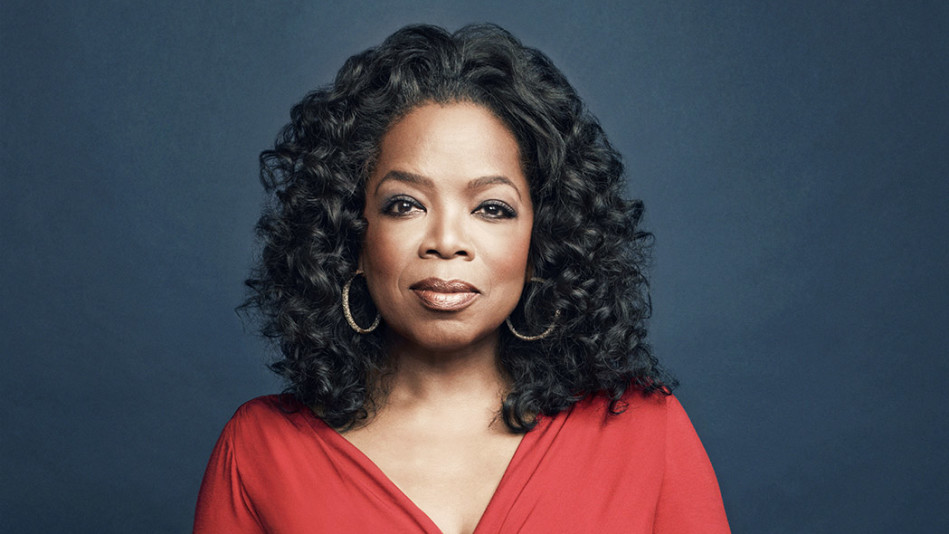

Cropped and aligned face


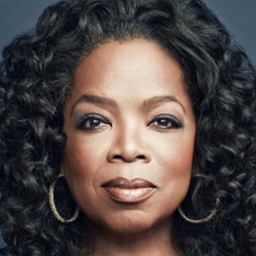

In [1]:
from ml4a import image     
from ml4a.utils import face

img = image.load_image('https://static.oprah.com/2016/01/201602-omag-wikfs-949x534.jpg')
image.display(img, title="Original image")
aligned_img, face_found = face.align_face(img)
if face_found:
    image.display(aligned_img, title="Cropped and aligned face")
else:
    print('No face found')

## Encoding faces and extracting landmarks

We can encode all detected faces in an image using `face.get_encodings` to extract a feature vector for each face.

In [3]:
target_encodings = face.get_encodings(img)
print('Found {} faces and extracted feature vectors for them.'.format(len(target_encodings)))

found 1 faces and extracted feature vectors for them.


If only one face is found, the list will have only one element in it. For this example, we simply take the first one (`target_encodings[0]`) to refer to the one face in this example image.

By passing an image and a target encoding to `face.get_face`, we will obtain the landmarks and bounding box of any face whose encoding matches `target_encodings` to within some threshold.

We can crop the original image using the box returned by `face.get_face`. 

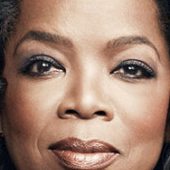

In [5]:
x, y, w, h, target_landmarks = face.get_face(img, target_encodings[0])

cropped_face = img.crop((x,y,x+w,y+h))
image.display(cropped_face)

The encodings are specific to a face. To demonstrate, we'll load another image with the same person in it, but also with other faces.

If we look for the `target_encodings` found from the original image in the new image, we can recognize the same person.

Original image


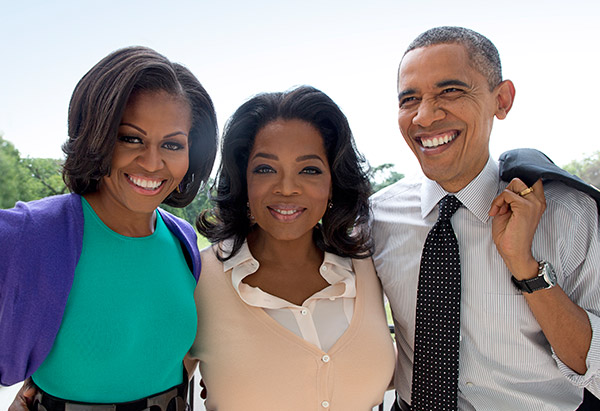

Detected target face


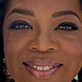

In [9]:
img2 = image.load_image('https://static.oprah.com/images/201211/omag/201211-omag-obamas-closeup-600x411.jpg')

x, y, w, h, target_landmarks = face.get_face(img2, target_encodings[0])
cropped_face = img2.crop((x,y,x+w,y+h))

image.display(img2, title='Original image')
image.display(cropped_face, title='Detected target face')

## Landmarks

Finally, note that `face.get_face` also returns `target_landmarks`, a variable which refers to the landmarks of the matched face. We can superimpose the landmarks on top of the original image.

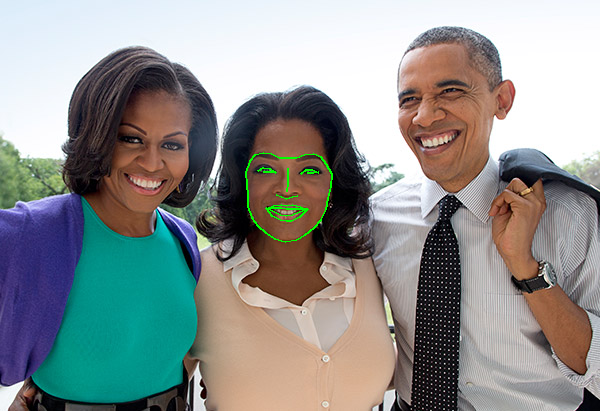

In [11]:
full_img = face.draw_landmarks(img2, target_landmarks, color=(0,255,0), width=2)
image.display(full_img)

## Parsing faces

You can extract a segmentation for the individual parts of the face.

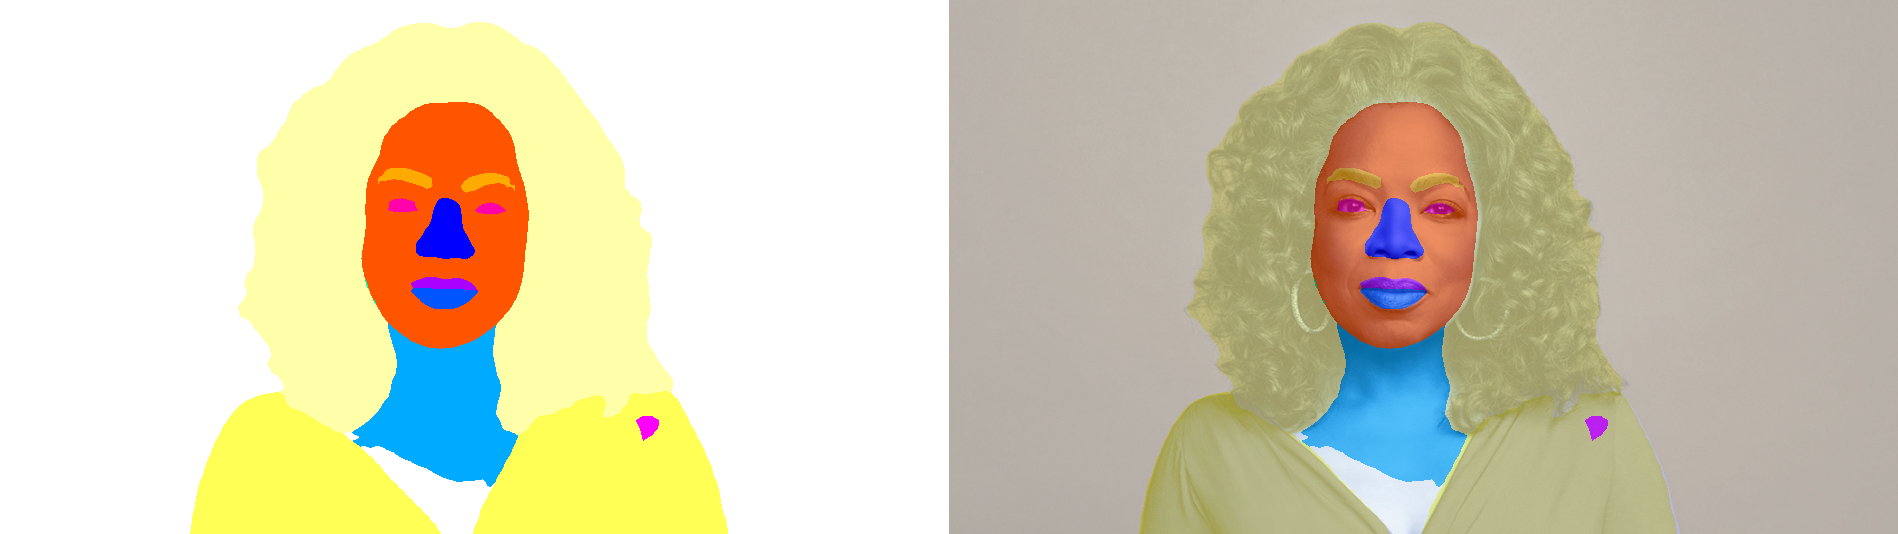

In [2]:
parsed_face = face.parse_face(img)

parse_vis1 = face.visualize_parse(parsed_face, overlay=None)
parse_vis2 = face.visualize_parse(parsed_face, overlay=img)

image.display([parse_vis1, parse_vis2])

## Getting masks from parses

You can extract masks from the parsing results, using one or more labels. To get a list of available labels, use `face.get_parsing_labels'.

['background', 'skin', 'l_brow', 'r_brow', 'l_eye', 'r_eye', 'eye_g', 'l_ear', 'r_ear', 'ear_r', 'nose', 'mouth', 'u_lip', 'l_lip', 'neck', 'neck_l', 'cloth', 'hair', 'hat']


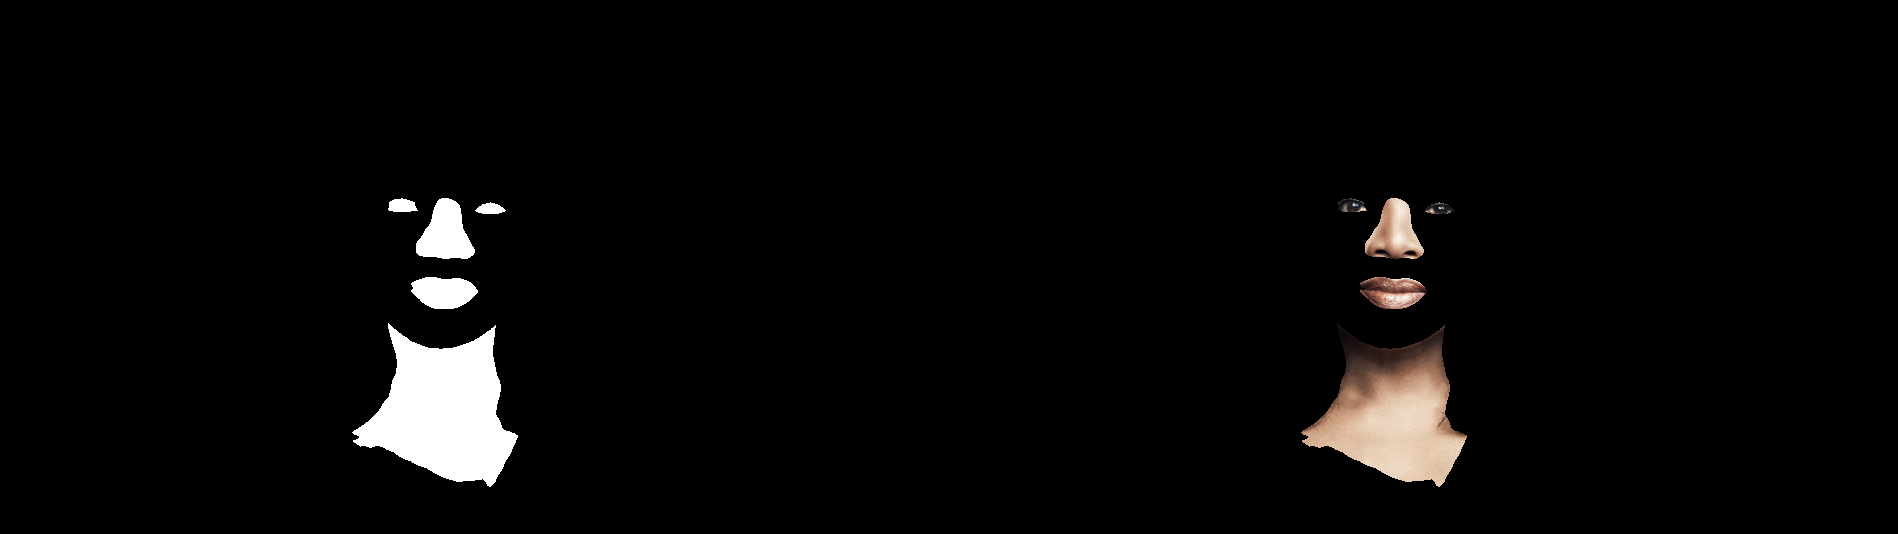

In [3]:
from ml4a.canvas import mask

print(face.get_parsing_labels())

face_mask = face.get_face_parts(parsed_face, 
    ['neck', 'l_eye', 'r_eye', 'nose', 'l_lip', 'u_lip', 'mouth'])

masked_img = mask.mask_image(face_mask, img)
image.display([face_mask, masked_img])
